# PREDICTING CHURN IN TELECOM'S DATASET

* **AUTHOR** : PETER MAINA  
* **TMs**    : Anthony Muiko / Diana Mongina  
* **DATE**   : 27Th August 2024  
* **COHORT** : DSFT-09

![alt text](Images/Churn.jpg)



## **1. BUSINESS UNDERSTANDING**

#### **PROJECT OVERVIEW**

> * Churn occurs when customers are leaving a company's services in pursuit of better services from other network providers.  
> * This is caused by dissatisfaction of the company's services or competitors offering better prices.  
> * Churn causes loss of the revenue to the company and it makes it hard to retain customers.  
> * Identifying potential churners will help to retain customers and improve customer satisfaction.

**BUSINESS PROBLEM**

> 1. The business problem is to identify the customers who have a high likelihood of churning and to develop effective strategies to reduce or to retain churning customers.  
> 2. Identify factors that cause customer dissatisfaction and churn, such as network quality, customer service issues, or pricing concerns.   
> 3. To identify customer segments based on their behavior and likelihood of churn inorder to tailor marketing and retention strategies to each group's specific needs and preferences.

**PROJECT OBJECTIVE**

> 1. **Churn Prediction**: To build predictive machine learning models that can predict which customers are likely to churn by using data to analyze customer features.
> 2. **Model Performance Assessment**: Comparing the machine learning models and determine which is the most accurate model in prediction.
> 3. **Increase Revenue**: Retaining more customers would allow for more revenue and also an increase in market share.
> 4. **Feature Insights**: Examining individual features will help gain insights on the causes of customer churn within the telecommunication company

**DATA SOURCE**

> My project utilizes data obtained from [Kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/data), it is about customer churn in a telecommunication company.

**STAKEHOLDERS**

> Stakeholders are telecommunications companies.  
> These companies can use this dataset and models to predict which customers are likely to churn.

**METHODOLOGY**

* The project will use the CRISP-DM that is Cross-Industry Standard Process for Data Mining methodology, which has several stages:

   >> Business understanding  
   >> Data Understanding  
   >> Data preparation  
   >> Modeling  
   >> Evaluation  
   >> Deployment  

## **2. DATA UNDERSTANDING**

In [127]:
# import relevant libraries
import csv 
import pandas as pd 
import seaborn as sns
import numpy as np


# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

# Modeling
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report 

# performance metrics
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [128]:
# loading the dataset
data = pd.read_csv("bigml_Telecom_dataset.csv")

In [129]:
# display the first rows of the dataframe
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [130]:
# display the shape of the dataframe
data.shape

(3333, 21)

In [131]:
column_no = len(data.columns)
row_no = len(data.index)
print(f"my data has {column_no} columns and {row_no} rows")

my data has 21 columns and 3333 rows


In [132]:
# summary information of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [133]:
# summary statistics of the dataframe
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [134]:
# Datatypes of the columns
data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [135]:
data.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

> Churn is divided as: True if the customer terminated their contract, otherwise False

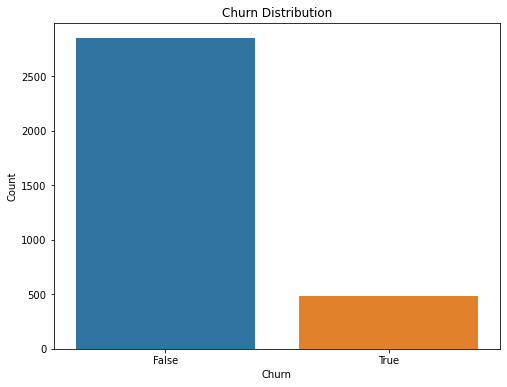

In [136]:
# countplot of the countplot features
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='churn')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

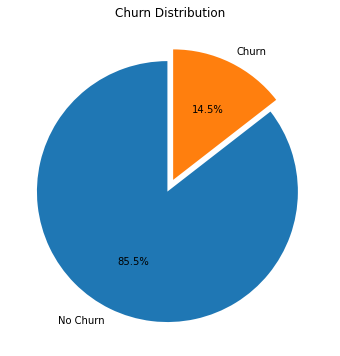

In [137]:
# Pie Chart the churn feature
data['churn'].value_counts().plot.pie(
    explode=[0.05, 0.05], 
    autopct='%1.1f%%', 
    startangle=90, 
    shadow=False, 
    figsize=(8, 6),
    labels=['No Churn', 'Churn'])
plt.ylabel('')
plt.title('Churn Distribution')
plt.show()

> There are 3,333 customers in the dataset.Clients with contacts are 2850 while 483 have terminated their contract with the Telecom. That is 14.5% of customers lost.
> It seems there is a class imbalance but will sort it out later on. 

## **2. DATA PREPARATION**

**EXPLANATORY DATA ANALYSIS**

In [138]:
# Checking for missing values
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

> There are no missing values in the data

In [139]:
# Checking for duplicates
data.duplicated().sum()

0

> There are no duplicates in the data

In [140]:
# Calculate unique values for each column
data.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [141]:
# Columns to drop 
columns_to_drop = ['account length', 'phone number', 'area code', 'state']
data.drop(columns=columns_to_drop, inplace=True)

> Focusing on columns_to_drop:
> 1. Account Length doesn't explain much about customer loyalty 
> 2. phone number doesn't explain much about the client's behaviours
> 3. Area code and State would limit our predictions only to a specific area preventing us from applying beyond the locale

In [142]:
data.dtypes

international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [143]:
# Splitting data into numberic and categorical features
#NUMERIC COLUMNS
numeric_columns = data.select_dtypes(include=['int64', 'float64'])
print("NUMERIC COLUMNS ARE:")
print(numeric_columns.columns,)

print()

#CATEGORICAL COLUMNS
categorical_columns = data.select_dtypes(include=['object', 'bool'])
print("CATEGORICAL COLUMNS ARE:")
print(categorical_columns.columns)

NUMERIC COLUMNS ARE:
Index(['number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls'],
      dtype='object')

CATEGORICAL COLUMNS ARE:
Index(['international plan', 'voice mail plan', 'churn'], dtype='object')


Churn will be my dependent variable

**UNIVARIATE ANALYSIS**

> It allows us to focus on each variable and to check into each of their distributions.  
> This provides insights into individual features

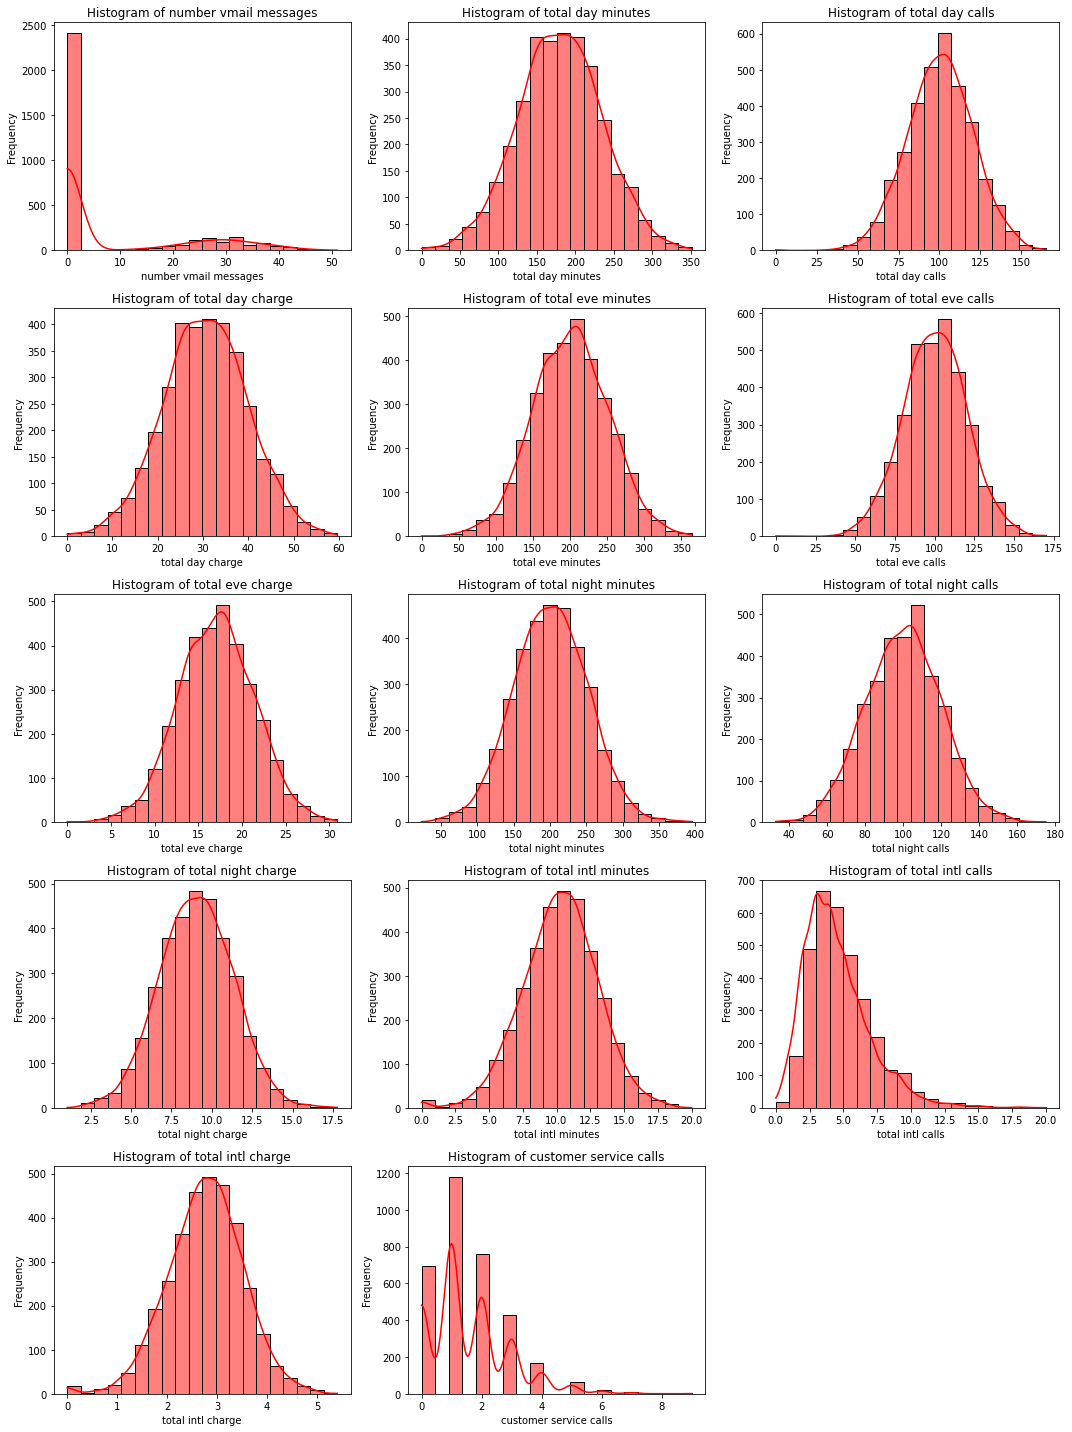

In [144]:
# Calculating the number of rows needed
subplots_per_row = 3
num_subplots = numeric_columns.shape[1]
num_rows = (num_subplots + subplots_per_row - 1) // subplots_per_row
# grid of subplots with determined rows and columns
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(15, 4 * num_rows))
axes = axes.flatten()

# Plotting histograms along with KDE
for i, column in enumerate(numeric_columns.columns):
    sns.histplot(numeric_columns[column], bins=20, kde=True, ax=axes[i], color='red')
    axes[i].set_title(f'Histogram of {column}') 
    axes[i].set_xlabel(column)  
    axes[i].set_ylabel('Frequency')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

> 1. KDE provides a smooth estimate of the distribution of each feature.
> 2. The KDE line almost perfectly matches the histogram in most of the columns indicating the data follows a normal
> distribution except for 'number_vmail_messages', 'total_intl_calls' and 'customer_service_calls'.
> 3. 'number_vmail_messages': It is right skewed with almost 0 customers sent over 2000 voicemails. 
> 4. 'total_intl_calls': Also right skewed with less that 5 customers making over 600 international calls.
> 5. 'customer_service_calls': There are close to 1200 clients making only 1 customer service call a day. Customer service calls has a few peaks indicating there are a few modes in the population. This implies it has to be a integer and not a float number.

**BIVARIATE ANALYSIS**

> It invloves exploring relationships between two variables.

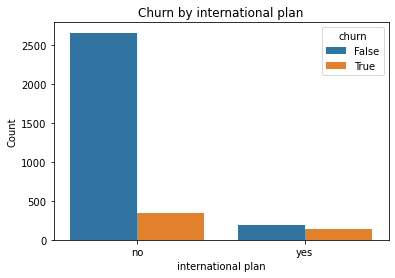

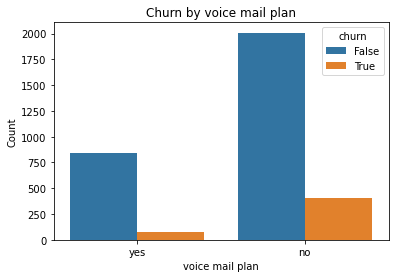

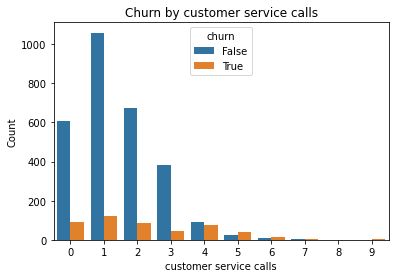

In [145]:
countplot_features = [
    'international plan', 
    'voice mail plan', 
    'customer service calls'
]
# create countplots for the features
for feature in countplot_features:
    sns.countplot(data=data, x=feature, hue= 'churn')
    plt.title(f'Churn by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


The above diagrams show a relationship for:  
        1. International plan and Churn  
        2. Voicemail plan and Churn  
        3. Customer Service calls and Churn

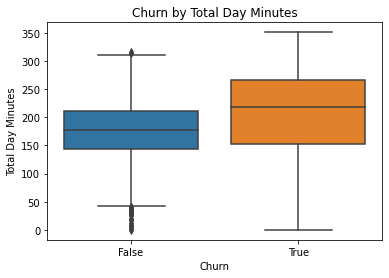

In [146]:
# boxplot for total day minutes and churn
plt.Figure(figsize=(8,6))
sns.boxplot(data=data, x='churn', y='total day minutes')
plt.title('Churn by Total Day Minutes')
plt.xlabel('Churn')
plt.ylabel('Total Day Minutes')
plt.show()

**MULTIVARIATE ANALYSIS**

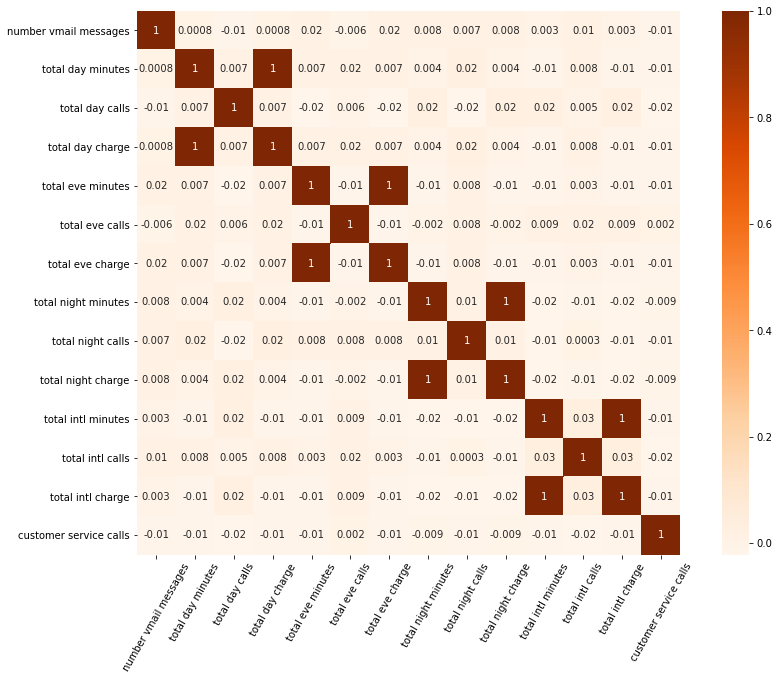

In [147]:
# Correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Creates a heatmap 
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Oranges', square=True, fmt='.0g')
plt.xticks(rotation=60)
plt.yticks(rotation=0)
plt.show()

> We can notice some instances of perfect correlation:  
    * A positive correlation of 1 between Total day charge and total day minutes  
    * A positive correlation of 1 between Total eve charge and total eve minutes   
    * A positive correlation of 1 between Total night charge and total night minutes    
    * A positive correlation of 1 between Total int charge and total int minutes  
> This could be because the charges are determined by the minutes used.  
> They all have presence of perfect multicollinearity

**CHECK FOR MULTICOLLINEARITY**

In [148]:
vif_data = pd.DataFrame()
vif_data["Variable"] = numeric_columns.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_columns.values, i) for i in range(numeric_columns.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)
vif_data

,Variable,VIF
3,total day charge,1.245993e+08
1,total day minutes,1.245949e+08
6,total eve charge,3.736678e+07
4,total eve minutes,3.736587e+07
7,total night minutes,1.071768e+07
9,total night charge,1.071740e+07
12,total intl charge,9.975854e+05
10,total intl minutes,9.971901e+05
8,total night calls,2.210595e+01
5,total eve calls,2.172941e+01


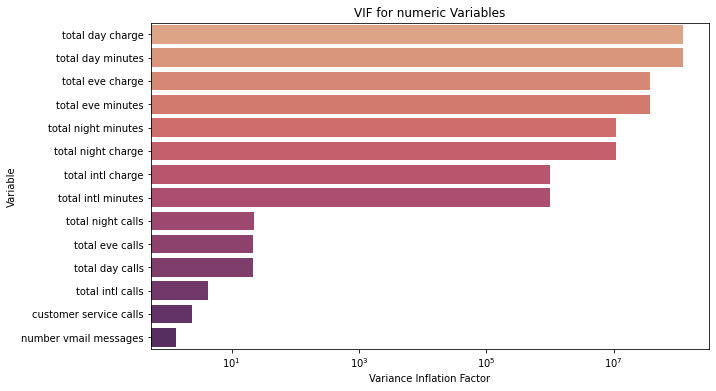

In [149]:
# Create a bar chart to visualize VIF values using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Variable', data=vif_data, palette='flare')
plt.xlabel('Variance Inflation Factor')
plt.title('VIF for numeric Variables')
plt.xscale("log")
plt.show()

> "total day minutes", "total day charge", "total eve charge", "total eve minutes", "total night minutes", "total night charge", "total intl minutes" and "total intl charge" have exceptionally high VIF values indicating multicollinearity among these related variables.

**NORMALIZE THE Numerical FEATURES**

In [150]:
# Numerical columns
numerical_col = data.select_dtypes(include= ["int64", "float"]).columns
# create an instance of the scaler
scaler = StandardScaler()

# transforming the data
data[numerical_col] = scaler.fit_transform(data[numerical_col])

> The code rescales the numerical data using the StandardScaler making the data have a mean of 0 and a standard deviation of 1

**Using  one-hot encoding (ohe) to transforming categorical data into a numerical format**

In [151]:
#categorical columns
categorical_col = data.select_dtypes(include= ["object", "bool"]).columns
# I will use get_dummies to do one-hot encoding and then drop the first category
data = pd.get_dummies(data, columns=categorical_col, drop_first=True)
# Display the first five rows
data.head()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan_yes,voice mail plan_yes,churn_True
0,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932,0,1,0
1,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932,0,1,0
2,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218,0,0,0
3,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354,1,0,0
4,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641,1,0,0


## **4. DATA MODELING**

> * This data is a classification task   
> * The churn column classifies customers into 2 categories: True, those who have churned and False, for loyal customers those who haven't churned.  
> * This binary classification problem aims to predict customer churn based on the features provided.

**I will attempt to build a model that can predict customer churn based on the features in our dataset.**  
**A recall score of 80% or highter would be a success**

**PREPROCESSING THE DATA**

In [152]:
# predictors
X = data.drop('churn_True', axis=1)
# target
y = data['churn_True']

#display first few rows
X.head()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan_yes,voice mail plan_yes
0,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932,0,1
1,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932,0,1
2,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218,0,0
3,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354,1,0
4,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641,1,0


**Train-Test Split**


> Splitting the data into train sets and test sets using 25% as the test_size

In [153]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

Dealing with class Imbalance.  
Imbalanced classes can lead to models that are biased towards the majority class, resulting in poor predictive accuracy for the minority class.

In [154]:
y_train.value_counts()

0    2141
1     358
Name: churn_True, dtype: int64

In [155]:
smote = SMOTE(random_state=42)
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)
y_train_resample.value_counts()

1    2141
0    2141
Name: churn_True, dtype: int64

I will explore the following models for the dataset:

* Logistic Regression Model
* Decision Tree Classifier
* Random Forest classifier


**A} LOGISTIC REGRESSION**

> Logistic regression is used for binary classification tasks.  
> The goal is to estimate the probability of an instance from a specific class based on the independent variables

In [156]:
# Create an instance of logistic regression model
logreg = LogisticRegression(random_state=42)

# Fit the model on the training data
logreg.fit(X_train_resample, y_train_resample)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

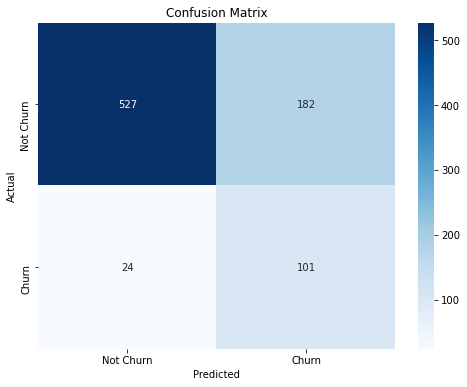

In [157]:
def plot_confusion_matrix(y_true, y_pred, labels):
    """
    Plots a confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Usage
plot_confusion_matrix(y_test, y_pred, labels=['Not Churn', 'Churn'])

> Confusion matrix reveals that the model has a higher count of true positives and true negatives compared to false positives and false negatives.   
> This observation suggests that the model's predictions are predominantly accurate and it avoids overfitting.

In [158]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print()

print("Classification Report: \n")
print(classification_report(y_test,y_pred))

Accuracy: 0.75

Classification Report: 

              precision    recall  f1-score   support

           0       0.96      0.74      0.84       709
           1       0.36      0.81      0.50       125

    accuracy                           0.75       834
   macro avg       0.66      0.78      0.67       834
weighted avg       0.87      0.75      0.79       834



In [159]:
# Make predictions on the test data using the tuned model
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7530
Precision: 0.3569
Recall: 0.8080
F1-score: 0.4951


1. The logistic regression model achieved a 75% accuracy implying that it correctly predicts non-churning customers with 96% precision. 
2. The model has a robust 83% recall for churning customers. 
3. Precision was lower at 36%. The model isn't so successful in predicting customers who churn
4. The F1-scores were 0.84 for non-churning and 0.50 for churning, leading to macro and weighted average F1-scores of 0.67 and 0.79 respectively. 
5. Arecall score of 0.81 signifying its effectiveness as a baseline model.   
   This score indicates that the model can accurately identify about 81% of the true positive instances.


> The model performs well in identifying non-churning customers, we would also need the model to predict churning customers 

**Hyperparameter tuning for Logistic Regression**

In [160]:
# Define a range of hyperparameters to search
param_grid = {
    'penalty': ['l2'],  
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
}

# Creates a grid search object
grid_search = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42), param_grid, cv=5, scoring='accuracy')

# Performs grid search on the resampled data
grid_search.fit(X_train_resample, y_train_resample)

# Gets the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Creates and trains the Logistic Regression model with the best hyperparameters
best_logistic_model = LogisticRegression(solver='liblinear', random_state=42, **best_params)
best_logistic_model.fit(X_train_resample, y_train_resample)

# Make predictions on the test data
y_pred = best_logistic_model.predict(X_test) 

# Print the best parameters
print("Best Parameters:")
for key, value in best_params.items():
    print(f"{key}: {value}")

# Print the best F1 score
best_f1_score = round(grid_search.best_score_, 3)
print("Best F1 Score:", best_f1_score)


Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Best Parameters:
C: 1
penalty: l2
Best F1 Score: 0.742


> The best hyperparameters for the Logistic Regression model are a 'C' value of 1 (indicating moderate regularization) and an 'l2' penalty.  



**B} DECISION TREE CLASSIFIER**

In [161]:
dt_clf = DecisionTreeClassifier(random_state=42)

#Fit on the training data
dt_clf.fit(X_train_resample,y_train_resample)

#predict on the test set
y_pred_dt = dt_clf.predict(X_test)

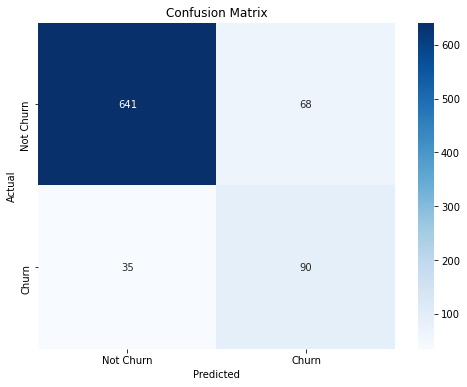

In [162]:
plot_confusion_matrix(y_test, y_pred_dt, labels=['Not Churn', 'Churn'])

In [163]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy:.2f}')

print()

print("Classification Report: \n")
print(classification_report(y_test,y_pred_dt))

Accuracy: 0.88

Classification Report: 

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       709
           1       0.57      0.72      0.64       125

    accuracy                           0.88       834
   macro avg       0.76      0.81      0.78       834
weighted avg       0.89      0.88      0.88       834



In [164]:
# Make predictions on the test data using the tuned model
y_pred_dt = dt_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_dt)

# Calculate precision
precision = precision_score(y_test, y_pred_dt)

# Calculate recall
recall = recall_score(y_test, y_pred_dt)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_dt)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8765
Precision: 0.5696
Recall: 0.7200
F1-score: 0.6360


1. The Decision tree classifier achieved a 88% accuracy. This score implies that the model accurately identifies approximately 88% of the actual positive instances.
2. The model has a robust 72% recall for churning customers. 
3. Precision is 57%. The model is moderate in predicting customers who churn
4. The F1-scores were 0.93 for non-churning and 0.64 for churning, leading to macro and weighted average F1-scores of 0.78 and 0. respectively. 
5. A recall score of 0.72 signifying its effectiveness as a baseline model.   
   This score indicates that the model can accurately identify about 72% of the true positive instances.




**Hyper Parameter Tuning for Decision Tree Classifier**

In [165]:
# Define the model
dt2_classifier = DecisionTreeClassifier()

# Define the parameter grid to search through
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Create a grid search object using 5-fold cross-validation and F1 score as the scoring metric
grid_search = GridSearchCV(estimator=dt2_classifier, param_grid=param_grid, cv=5, scoring='f1')

# Fit the grid search to the resampled training data
grid_search.fit(X_train_resample, y_train_resample)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Print the best parameters and the best F1 score
print("Best Parameters:", best_params)
print("Best F1 Score:", grid_search.best_score_) 

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1 Score: 0.9164847704621245


**Fitting the Decision Tree Classifier with the best parameters**

In [166]:
dt2_tuned = DecisionTreeClassifier(criterion='entropy', 
                                   max_depth=10,
                                   min_samples_leaf=1,
                                   min_samples_split=2)

# Fitting  model
dt2_tuned.fit(X_train_resample, y_train_resample)

# Making predictions on the test data
dt2_y_pred = dt2_tuned.predict(X_test)

# Evaluating the model
dt2_f1_score = f1_score(y_test, dt2_y_pred)
dt2_acc_score = accuracy_score(y_test, dt2_y_pred)
dt2_prec_score = precision_score(y_test, dt2_y_pred)
dt2_rec_score = recall_score(y_test, dt2_y_pred)

# Printing the results
print("Tuned Decision Tree Classifier")
print(f"F1 Score : {dt2_f1_score:.4f}")
print(f"Accuracy Score : {dt2_acc_score:.4f}")
print(f"Precision Score: {dt2_prec_score:.4f}")
print(f"Recall Score: {dt2_rec_score:.4f}")

Tuned Decision Tree Classifier
F1 Score : 0.6848
Accuracy Score : 0.9029
Precision Score: 0.6667
Recall Score: 0.7040


> After tuning the Decision Tree Classifier with the best hyper parameters yields:  
* F1 score increase from 0.6360 to 0.7023 in dt2_tuned.  
* Accuracy score increases from 0.8765 to 0.9065 in dt2_tuned.  
* Precision score increases from 0.5696  to 0.6715 in dt2_tuned.  
* Recall score decreases from 0.7200 to 0.7360 in dt2_tuned.

**C} RANDOM FOREST CLASSIFIER**

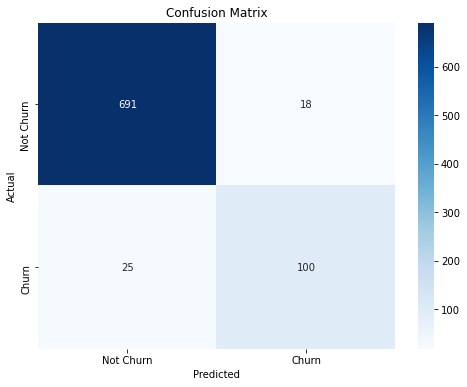

In [167]:
# Create and train the Random Forest model
rf_clf = RandomForestClassifier(random_state=42)
#fit on the training data
rf_clf.fit(X_train_resample, y_train_resample)

# Make predictions on the test data
y_pred_rf = rf_clf.predict(X_test)

plot_confusion_matrix(y_test, y_pred_rf,  labels=['Not Churn', 'Churn'])

In [168]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy:.2f}')

print()

print("Classification Report: \n")
print(classification_report(y_test,y_pred_rf))

Accuracy: 0.95

Classification Report: 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       709
           1       0.85      0.80      0.82       125

    accuracy                           0.95       834
   macro avg       0.91      0.89      0.90       834
weighted avg       0.95      0.95      0.95       834



In [169]:
# Make predictions on the test data using the tuned model
y_pred_rf = rf_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)

# Calculate precision
precision = precision_score(y_test, y_pred_rf)

# Calculate recall
recall = recall_score(y_test, y_pred_rf)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_rf)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9484
Precision: 0.8475
Recall: 0.8000
F1-score: 0.8230


> 1. The Random Forest Classifier model has a recall of 80%.  
> * It can accurately predict 80% of the positive instances
> 2. The Random Forest Classifier has an accuracy on about 95%, outperforming the Logistic Regression model 
> 3. It showed exceptional precision (97%) and recall (97%) for non-churning customers (class 0), resulting in a high F1-score of 0.97

**Hyper-parameter Tuning For a Random Forest Model**

In [170]:
# Define the parameter grid to search through
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Scores
scores = ['f1', 'recall', 'precision']

# Create a grid search object using 5-fold cross-validation
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring=scores, refit='f1', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_resample, y_train_resample)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Print the best parameters and the best score with 3 decimal places
print("Hyperparameter Tuning for Random Forest Model:")
print("Best Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

best_score = round(grid_search.best_score_, 3)
print(f"Best Score: {best_score}")

Hyperparameter Tuning for Random Forest Model:
Best Parameters:
max_depth: 15
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 200
Best Score: 0.947


The best f1 score of 0.947

**Fitting the Random ForestClassifier with the best parameters**

In [171]:
# Train the random forest classifier
rf2 = RandomForestClassifier(n_estimators=150,
                             random_state=42,
                             max_depth=15,
                             min_samples_leaf=1,
                             min_samples_split=2)
rf2.fit(X_train_resample, y_train_resample)

# Make predictions on the test data
rf2_y_pred = rf2.predict(X_test)

# Evaluate the model's accuracy
rf2_f1_score = round(f1_score(y_test, rf2_y_pred), 3)
rf2_acc_score = round(accuracy_score(y_test, rf2_y_pred), 3)
rf2_prec_score = round(precision_score(y_test, rf2_y_pred), 3)
rf2_rec_score = round(recall_score(y_test, rf2_y_pred), 3)


print("Random Forest Model with Best Parameters:")
print(f'The Precision: {rf2_prec_score}')
print(f'The Accuracy: {rf2_acc_score}')
print(f'F1 Score: {rf2_f1_score}')
print(f'The Recall Score: {rf2_rec_score}')

Random Forest Model with Best Parameters:
The Precision: 0.847
The Accuracy: 0.948
F1 Score: 0.823
The Recall Score: 0.8


> Tuning the Random Forest Classifier with the best hyper parameters yields F1 score 0.823

## **5.EVALUATION OF THE MODELS**

The evaluation metrics that I will focus on are:
* Accuracy
* Precision
* Recall
* F1 Score


**1. ACCURACY**

| Models | Accuracy |
| ------- | ------- |
| Logistic Regression | 0.7530 |
| Decision Tree Classifier | 0.8765 |
| Random Forest Classifier | 0.9484 |

> Random Forest Classifier has an accuracy of approximately 95%.  
> It accurately predicts the outcome of the target variable

**2. PRECISION**

| Models | Precision |
| ------- | ------- |
| Logistic Regression | 0.3569 |
| Decision Tree Classifier | 0.5696 |
| Random Forest Classifier | 0.8475|

> Random Forest Classifier has a precision of approximately 85%.  
> This model has the highest precision, implying it has the least false positive

**3. Recall**

| Models | Precision |
| ------- | ------- |
| Logistic Regression | 0.8080 |
| Decision Tree Classifier | 0.7200 |
| Random Forest Classifier | 0.8000 |

> Logistic Regression has a recall of approximately 81%.  
> This model it identifies more true positives and fewer false negatives

**4. f1-Score**

| Models | Precision |
| ------- | ------- |
| Logistic Regression | 0.4951 |
| Decision Tree Classifier | 0.6360 |
| Random Forest Classifier | 0.8230 |

> Random Forest Classifier has an F1 Score of 0.8230.  
> This model has a better balance between recall and precision

**Summary of models**

> In summary, Random Forest Classiifer model is the best-performing model with a 95% accuracy and strong F1-scores for both non-churning and churning customers.   
> It demonstrates a well-balanced ability to predict churn, making it the most recommended choice for this dataset.

**FEATURES IMPORTANCE**

In [172]:
# Get the feature importances
importances = rf2.feature_importances_

# Create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# Sort the dataframe by the feature importances in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the first few rows of the feature importances with 3 decimal places
print(feature_importances.head().round(4))

                   feature  importance
13  customer service calls      0.1906
1        total day minutes      0.1262
3         total day charge      0.1181
11        total intl calls      0.0930
6         total eve charge      0.0574


From Feature Importance Plot, Customer service calls, Total day minutes and Total Day Charge are the most influential features.  
>> Monitoring the number of customer service calls is important because a high volume may indicate customer dissatisfaction.  
>> Reduce daytime charges is crucial

**CONCLUSION**

> **Model Performance**: I tested 3 models with Random Forest Classifier emerging as the top performer, achieving a remarkable 95% accuracy and well-balanced precision and recall.

> **Key Features**: The analysis showed some influential features: "customer_service_calls", "total_day_minutes","total day charge", "total intl calls" and "total eve charge" highlighting their importance in predicting churn.

> In summary, the analysis recommends Random Forest Classifier for predicting customer churn.

**LIMITATIONS**

> 1. Complexity of Random Forest
> 2. The data may have unnoticed trends over time which might affect my analysis
> 3. Not all dataset features were useful in predicting churn leading to potential model inefficiencies.
> 4. Complex models like Random Forest are at a risk of overfitting reducing model robust validation and regularization.

* Further research and analysis are recommended to enhance findings, considering additional data sources and exploring alternative modeling approaches.

**6} RECOMMENDATIONS**

>  **Improve Customer Service**: 
 * High customer service calls correlate with churn.  
 * Reduce customer service calls and improve quality of customer service by offering comprehensive training to customer service representatives.  
> **Pricing Structure Evaluation**:
 * Evaluate the pricing structure for day, evening, night, and international charges.  
 * Adjusting pricing plans or introducing discounted packages would address the concerns related to higher charges, which contribute to customer churning.  
> **Engage with Clients likely to churn**:
 * Reach out to clients who have a high daily usage.
 * They have the most likelihood of churning.